# Parkinsons Telemonitoring

In [1]:
import pandas as pd
import ehrapy as ep
import ehrdata as ed
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [3]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data -O parkinsons_telemonitoring.data
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names -O parkinsons_telemonitoring.names



7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87Saving 'parkinsons_telemonitoring.data'
87parkinsons_telemonit   0% [<=>                           ]  412.08K    --.-KB/s87[Files: 0  Bytes: 0  [0 B/s] Re]87parkinsons_telemonit 100% [=============================>]  902.27K    1.46MB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data]
87parkinsons_telemonit 100% [=============================>]  902.27K    1.46MB/s87[Files: 1  Bytes: 902.27K [679.]8

7[Files: 0  Bytes: 0  [0 B/s] Re]87[http://archive.ics.uci.edu/ml/]87Saving 'parkinsons_telemonitoring.names'
87parkinsons_telemonit 100% [=============================>]    8.65K    --.-KB/s87HTTP response 200 OK [http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names]
87parkinsons_telemonit 100% [=============================>]    8.65K    --.-KB/s87[Files: 1

# Data Wrangling

In [4]:
data = pd.read_csv("parkinsons_telemonitoring.data", sep=",")

Since the dataset does not have a measurement ID we add one.

In [5]:
data["measurement_id"] = range(1, len(data) + 1)

In [6]:
data.set_index("measurement_id", inplace=True)

In [7]:
data.to_csv("parkinsons_telemonitoring_prepared.csv")

## ehrapy sanity check

In [8]:
columns_obs_only=["subject#", "test_time"]

In [9]:
adata = ep.io.read_csv("parkinsons_telemonitoring_prepared.csv",
                   index_column="measurement_id",
                   columns_obs_only=columns_obs_only
                   )
edata = ed.EHRData.from_adata(adata=adata)


In [10]:
edata=ep.pp.encode(edata,autodetect=True)

! Feature 'sex' was detected as categorical features stored numerically.Please verify and correct using `ep.ad.replace_feature_types` if necessary.
! Feature types were inferred and stored in adata.var[feature_type]. Please verify using `ep.ad.feature_type_overview` and adjust if necessary using `ep.ad.replace_feature_types`.
! Detected no columns that need to be encoded. Leaving passed AnnData object unchanged.


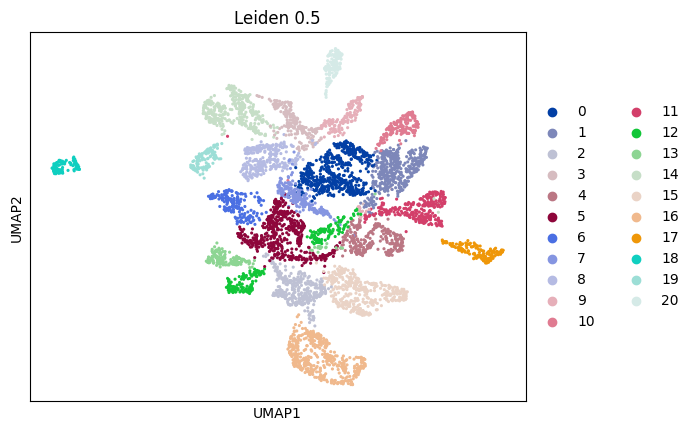

In [11]:
ep.pp.scale_norm(edata)
ep.pp.pca(edata)
ep.pp.neighbors(edata)
ep.tl.umap(edata)
ep.tl.leiden(edata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(edata, color=["leiden_0_5"], title="Leiden 0.5")